In [2]:
import mlflow

In [3]:
from official.nlp import bert
import official.nlp.bert.tokenization
import tensorflow_text

In [4]:
import requests

In [23]:
output.content

b'{"error_code": "BAD_REQUEST", "message": "Failed to parse input as a Pandas DataFrame. Ensure that the input is a valid JSON-formatted Pandas DataFrame with the `split` orient produced using the `pandas.DataFrame.to_json(..., orient=\'split\')` method.", "stack_trace": "Traceback (most recent call last):\\n  File \\"/miniconda/envs/custom_env/lib/python3.6/site-packages/mlflow/pyfunc/scoring_server/__init__.py\\", line 126, in parse_json_input\\n    return _dataframe_from_json(json_input, pandas_orient=orient, schema=schema)\\n  File \\"/miniconda/envs/custom_env/lib/python3.6/site-packages/mlflow/utils/proto_json_utils.py\\", line 239, in _dataframe_from_json\\n    path_or_str, orient=pandas_orient, dtype=False, precise_float=precise_float\\n  File \\"/miniconda/envs/custom_env/lib/python3.6/site-packages/pandas/util/_decorators.py\\", line 199, in wrapper\\n    return func(*args, **kwargs)\\n  File \\"/miniconda/envs/custom_env/lib/python3.6/site-packages/pandas/util/_decorators.py

In [11]:
curl -X POST -H "Content-Type:application/json; format=pandas-split" --data "{\"columns\":[\"alcohol\", \"chlorides\", \"citric acid\", \"density\", \"fixed acidity\", \"free sulfur dioxide\", \"pH\", \"residual sugar\", \"sulphates\", \"total sulfur dioxide\", \"volatile acidity\"],\"data\":[[12.8, 0.029, 0.48, 0.98, 6.2, 29, 3.33, 1.2, 0.39, 75, 0.66]]}" http://127.0.0.1:1234/invocations

SyntaxError: invalid syntax (<ipython-input-11-cb9c31dfca41>, line 1)

In [5]:
toke = bert.tokenization.FullTokenizer('vocab.txt')

In [6]:
class custom_bert_encoder:
    def __init__(self, vocab_file, max_len=128):
        self.bert = bert.tokenization.FullTokenizer(vocab_file)
        self.max_len = max_len
    def bert_encode(self, text):
        text = self.bert.tokenize(text)
        text = text[: self.max_len - 2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = self.max_len - len(input_sequence)
        tokens = self.bert.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * self.max_len
        return {"input_mask":[pad_masks], "input_type_ids":[segment_ids], "input_word_ids":[tokens]}

b = custom_bert_encoder('vocab.txt')
data = b.bert_encode('In this invention, I make a gas that enables cars to fly')

In [7]:
output = requests.post('http://localhost:8080/invocations', json={"inputs":data})

In [9]:
import json

In [19]:
output.content.decode('utf-8')

'[[0.0023689568042755127, 0.0002250373363494873, 0.002939075231552124, 0.00035458803176879883, 0.0006634294986724854, 8.082009117060807e-06, 4.350474046077579e-05, 0.0017937123775482178, 0.00023362040519714355, 0.012187600135803223, 0.0014276206493377686, 1.7025186025421135e-05, 1.7080332327168435e-05, 2.735214184212964e-05, 0.00011636333510978147, 1.252029869647231e-05, 9.496066923020408e-05, 4.8254609282594174e-05, 5.1471412007231265e-05, 3.5256620321888477e-05, 0.00011677588918246329, 2.7915244572795928e-05, 0.00023311376571655273, 8.841479575494304e-05, 3.028966239071451e-05, 3.457525963312946e-05, 0.0001056778637575917, 2.274407415825408e-05, 0.00019603967666625977, 0.00011681164323817939, 0.00017628073692321777, 0.00019845366477966309, 8.168278873199597e-05, 2.361603947065305e-05, 0.0019405186176300049, 0.00010019166802521795, 7.486789399990812e-05, 9.263855463359505e-05, 0.005760520696640015, 0.0008840560913085938, 0.002428203821182251, 0.000577777624130249, 0.000273972749710083

In [24]:
json.loads(output.text)[0]

[0.0023689568042755127,
 0.0002250373363494873,
 0.002939075231552124,
 0.00035458803176879883,
 0.0006634294986724854,
 8.082009117060807e-06,
 4.350474046077579e-05,
 0.0017937123775482178,
 0.00023362040519714355,
 0.012187600135803223,
 0.0014276206493377686,
 1.7025186025421135e-05,
 1.7080332327168435e-05,
 2.735214184212964e-05,
 0.00011636333510978147,
 1.252029869647231e-05,
 9.496066923020408e-05,
 4.8254609282594174e-05,
 5.1471412007231265e-05,
 3.5256620321888477e-05,
 0.00011677588918246329,
 2.7915244572795928e-05,
 0.00023311376571655273,
 8.841479575494304e-05,
 3.028966239071451e-05,
 3.457525963312946e-05,
 0.0001056778637575917,
 2.274407415825408e-05,
 0.00019603967666625977,
 0.00011681164323817939,
 0.00017628073692321777,
 0.00019845366477966309,
 8.168278873199597e-05,
 2.361603947065305e-05,
 0.0019405186176300049,
 0.00010019166802521795,
 7.486789399990812e-05,
 9.263855463359505e-05,
 0.005760520696640015,
 0.0008840560913085938,
 0.002428203821182251,
 0.0

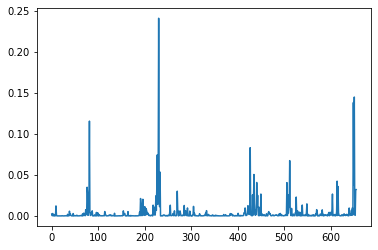

In [200]:
plt.plot(eval(output.content.decode('utf-8'))[0])

In [162]:
output.text

'{"error_code": "BAD_REQUEST", "message": "Failed to parse input from JSON. Ensure that input is a valid JSON list or dictionary.", "stack_trace": "NoneType: None\\n"}'

In [189]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [85]:
users = json.loads(output.content)

In [86]:
users

{'error_code': 'BAD_REQUEST',
 'message': 'Encountered an unexpected error while evaluating the model. Verify that the serialized input Dataframe is compatible with the model for inference.',
 'stack_trace': 'Traceback (most recent call last):\n  File "/miniconda/envs/custom_env/lib/python3.6/site-packages/mlflow/pyfunc/scoring_server/__init__.py", line 306, in transformation\n    raw_predictions = model.predict(data)\n  File "/miniconda/envs/custom_env/lib/python3.6/site-packages/mlflow/pyfunc/__init__.py", line 605, in predict\n    return self._model_impl.predict(data)\n  File "/miniconda/envs/custom_env/lib/python3.6/site-packages/mlflow/keras.py", line 475, in predict\n    predicted = _predict(data)\n  File "/miniconda/envs/custom_env/lib/python3.6/site-packages/mlflow/keras.py", line 465, in _predict\n    predicted = self.keras_model.predict(data)\n  File "/miniconda/envs/custom_env/lib/python3.6/site-packages/keras/engine/training.py", line 1751, in predict\n    tmp_batch_outputs

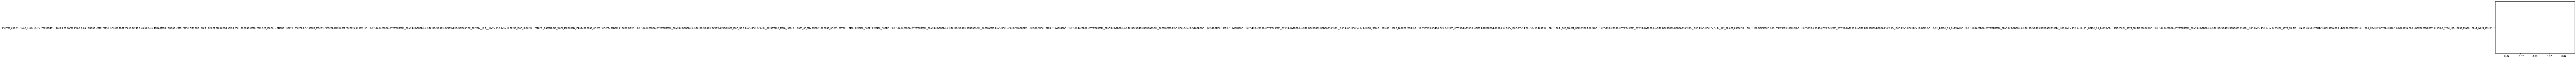

In [67]:
plt.plot(np.array(output.content).T)

In [56]:
len(output.content.decode('utf-8').split(','))

83968